William Bo 

Scott Schwartz

Week 3 Hw 


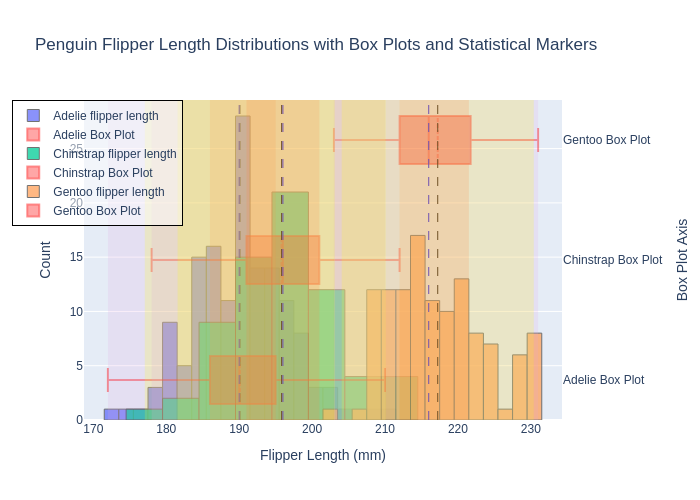

In [8]:
# PROBLEM NUMBER 1

import seaborn as sns
import plotly.graph_objects as go
import numpy as np

# Load the dataset
df = sns.load_dataset('penguins').dropna()

# Initialize an empty figure
fig = go.Figure()

# Iterate over species to create histograms, add statistical markers, and overlay box plots
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    
    # Calculate statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    std = species_data['flipper_length_mm'].std()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)

    # Add the histogram
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=f'{species} flipper length', 
        opacity=0.75,  # Adjust opacity for better visibility
        marker=dict(line=dict(width=1)),  # Add border for better visibility
    ))
    
    # Add the box plot (moved higher using a secondary y-axis)
    fig.add_trace(go.Box(
        x=species_data['flipper_length_mm'],
        name=f'{species} Box Plot',
        marker_color='rgba(255, 0, 0, 0.6)',  # Red color for the box plot
        boxmean=True,  # Display mean in the box plot
        boxpoints=False,  # Do not show individual points
        width=0.4,  # Width of the box plot
        opacity=0.7,  # Slightly less transparent
        yaxis='y2'  # Use secondary y-axis
    ))

    # Calculate the max y-value of the histogram for this species
    hist_values = np.histogram(species_data['flipper_length_mm'], bins=20)
    max_y = max(hist_values[0])  # Max count in the histogram

    # Adjust y-values for better annotation placement
    y_offset = max_y * 0.05  # 5% of the max_y to space out the annotations
    y_position_mean = max_y - y_offset  # Position mean slightly below max
    y_position_median = max_y - 2 * y_offset  # Position median below mean
    y_position_range = max_y - 3 * y_offset  # Position range below median
    y_position_iqr = max_y - 4 * y_offset  # Position IQR below range
    y_position_sd = max_y - 5 * y_offset  # Position 2 SD range at bottom

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line_width=1, line_dash="dash", line_color="black", 
                   annotation_text=f'Mean: {mean:.1f}', annotation_position="top left", 
                   annotation_y=y_position_mean)
    
    fig.add_vline(x=median, line_width=1, line_dash="dash", line_color="blue", 
                   annotation_text=f'Median: {median:.1f}', annotation_position="top right", 
                   annotation_y=y_position_median)

    # Add a rectangle for the range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, 
                   fillcolor="rgba(221, 160, 221, 0.3)", opacity=0.6, 
                   line_width=0, annotation_text=f'Range: {min_val:.1f} - {max_val:.1f}', 
                   annotation_position="bottom left", annotation_y=y_position_range)

    # Add a rectangle for the interquartile range (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, 
                   fillcolor="rgba(255, 99, 71, 0.3)", opacity=0.6, 
                   line_width=0, annotation_text=f'IQR: {q1:.1f} - {q3:.1f}', 
                   annotation_position="bottom right", annotation_y=y_position_iqr)

    # Add a rectangle for the range within two standard deviations (mean - 2*std to mean + 2*std)
    fig.add_vrect(x0=mean - 2*std, x1=mean + 2*std, 
                   fillcolor="rgba(255, 255, 0, 0.3)", opacity=0.6, 
                   line_width=0, annotation_text=f'2 SD: {mean - 2*std:.1f} - {mean + 2*std:.1f}', 
                   annotation_position="top", annotation_y=y_position_sd)

# Update layout for better readability and to enable the secondary y-axis
fig.update_layout(
    title="Penguin Flipper Length Distributions with Box Plots and Statistical Markers",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    yaxis2=dict(overlaying='y', side='right', showgrid=False, title="Box Plot Axis"),  # Secondary y-axis
    barmode='overlay',
    
    # Move the legend (key) to the left
    legend=dict(
        x=-0.15,  # Move the legend to the left
        y=1,  # Keep it vertically aligned at the top
        bgcolor='rgba(255, 255, 255, 0.5)',  # Optional: add a white background with some transparency
        bordercolor='black',  # Optional: add a black border
        borderwidth=1  # Optional: set the border width
    )
)

# Show the figure
fig.show(renderer="png")




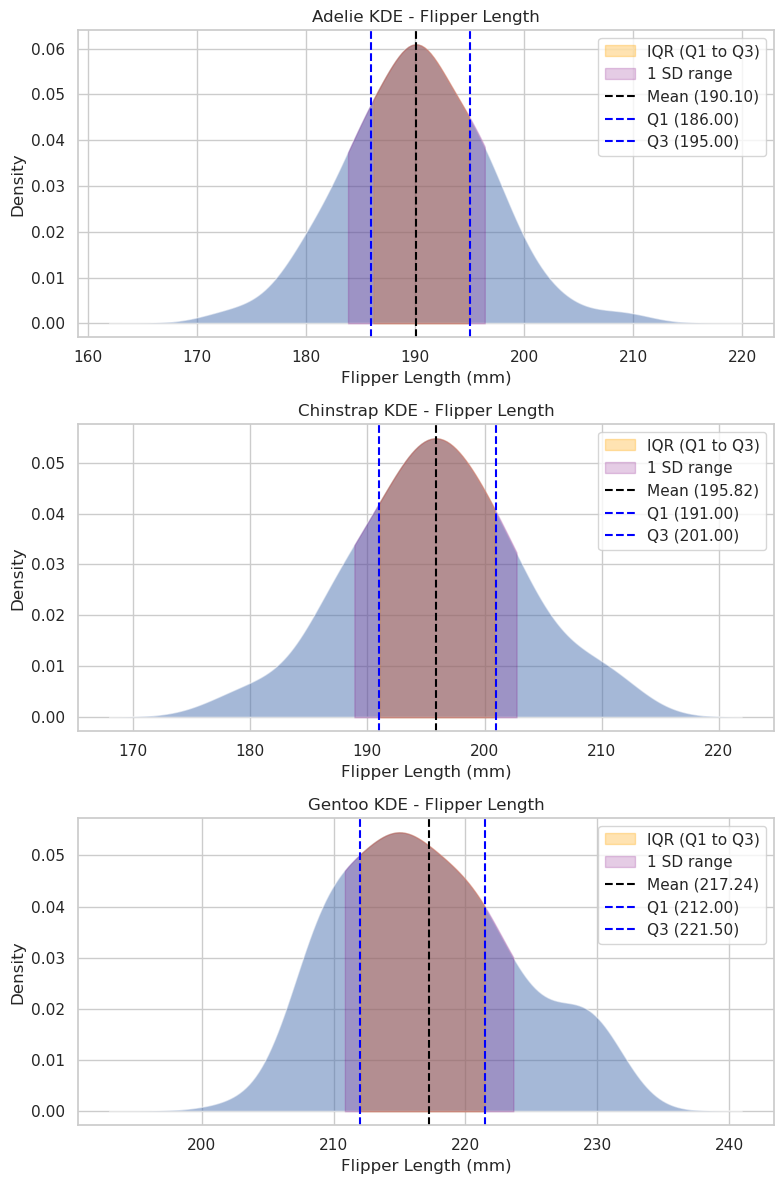

In [17]:
# PROBLEM NUMBER 2


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Load the dataset and drop missing values
df = sns.load_dataset('penguins').dropna()

# Set the style and figure size
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(8, 12))  # Create 3 plots in a column

# Define species and iterate over them to plot KDEs for flipper_length_mm
species_list = df['species'].unique()

for i, species in enumerate(species_list):
    species_data = df[df['species'] == species]['flipper_length_mm']
    
    # Calculate statistics
    mean = species_data.mean()
    std = species_data.std()
    q1 = species_data.quantile(0.25)
    q3 = species_data.quantile(0.75)
    
    # Calculate KDE using scipy
    kde = gaussian_kde(species_data)
    x_values = np.linspace(species_data.min() - 10, species_data.max() + 10, 200)  # Create x values for the KDE
    y_values = kde(x_values)

    # Plot KDE
    axes[i].fill(x_values, y_values, alpha=0.5)

    # Fill between Q1 and Q3 (IQR) range
    axes[i].fill_between(x_values, y_values, where=(x_values >= q1) & (x_values <= q3), 
                         color='orange', alpha=0.3, label='IQR (Q1 to Q3)')
    
    # Fill between mean - 1*std and mean + 1*std (standard deviation range)
    axes[i].fill_between(x_values, y_values, where=(x_values >= mean - std) & (x_values <= mean + std), 
                         color='purple', alpha=0.2, label='1 SD range')

    # Add vertical lines for mean, Q1, and Q3
    axes[i].axvline(mean, color='black', linestyle='--', label=f'Mean ({mean:.2f})')
    axes[i].axvline(q1, color='blue', linestyle='--', label=f'Q1 ({q1:.2f})')
    axes[i].axvline(q3, color='blue', linestyle='--', label=f'Q3 ({q3:.2f})')
    
    # Set labels and title
    axes[i].set_title(f'{species} KDE - Flipper Length')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')
    
    # Add legend
    axes[i].legend(loc='upper right')

# Adjust the layout for better readability
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
# PROBLEM NUMBER 2 CONT (OPTIONAL THEME SETTING)


import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set the style and theme
sns.set_style("whitegrid")
sns.set_theme(palette="colorblind")

# Load the dataset
df = sns.load_dataset('penguins').dropna()

# Create a figure and axes for three subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Iterate over species to create KDE plots
for i, species in enumerate(df['species'].unique()):
    species_data = df[df['species'] == species]
    
    # Create the KDE plot
    sns_kde = sns.kdeplot(data=species_data, x='flipper_length_mm', ax=axes[i], fill=True)
    
    # Set titles and labels
    axes[i].set_title(f'{species} Flipper Length KDE')
    axes[i].set_xlabel('Flipper Length (mm)')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


PROBLEM NUMBER 3

THe three data distribution visualization methods each hold their own merits. When trying to understand the sumarization of data, I would prefer using box plots since it easily allows you to see this data. When trying to interpret samplee size or shape of my distribution, a histogram or KDE plot would be more optimal. Ultimately when analyzing and visualizing data, my preferance would change depending on what task I was trying to accomplish, as each visualization is equally valid in its own intended situation. 

In [ ]:
# PROBLEM NUMBER 4

from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [ ]:
# PROBLEM NUMBER 4 CONT.

# Sample size
n = 1500

# Generate data
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

# Calculate mean for each dataset
mean1 = np.mean(data1)
mean2 = np.mean(data2)
mean3 = np.mean(data3)
mean4 = np.mean(data4)

# Calculate variance for each dataset
var1 = np.var(data1)
var2 = np.var(data2)
var3 = np.var(data3)
var4 = np.var(data4)

# Print the mean and variance values
print(f"Mean of Data1 (A): {mean1:.4f}, Variance: {var1:.4f}")
print(f"Mean of Data2 (B): {mean2:.4f}, Variance: {var2:.4f}")
print(f"Mean of Data3 (C): {mean3:.4f}, Variance: {var3:.4f}")
print(f"Mean of Data4 (D): {mean4:.4f}, Variance: {var4:.4f}")

# Create subplots for box plots
fig = make_subplots(rows=1, cols=4)

# Add box plots
fig.add_trace(go.Box(y=data1, name=f'A (Mean: {mean1:.2f}, Var: {var1:.2f})', marker=dict(color='red')), row=1, col=1)
fig.add_trace(go.Box(y=data2, name=f'B (Mean: {mean2:.2f}, Var: {var2:.2f})', marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Box(y=data3, name=f'C (Mean: {mean3:.2f}, Var: {var3:.2f})', marker=dict(color='red')), row=1, col=3)
fig.add_trace(go.Box(y=data4, name=f'D (Mean: {mean4:.2f}, Var: {var4:.2f})', marker=dict(color='red')), row=1, col=4)

# Update layout
fig.update_layout(height=300, width=900, title_text="Row of Box Plots with Mean and Variance")

# Display the plot
fig.show(renderer="png")



4.1) Datasets A and B, and C have similar means at around 5, although **none** of the datasets have similar variances, with the variances: 

#### Variances of Datasets:
- **Variance of Data1 (A):** 8.3744
- **Variance of Data2 (B):** 2.2612
- **Variance of Data3 (C):** 9.1597
- **Variance of Data4 (D):** 0.2488


4.2) Datasets A, B, and C, have similar means, although very different variances

4.3) None of the datasets have similar variances, although dataset D has a very different mean (~6) from the other 3 datasets (A, B, C) 

4.4) Dataset D has both a quite different mean and a quite different variance from the rest of the dataset

(Im not fully sure if the question is asking for **pairs** which have differences between **eachother**, or from the **general dataset**. Just in case, here are pairs that have **both** very different means and very different variances from eachother) 

(A and D), (B and D), (C and D) 

CHAT GPT LINK

https://chatgpt.com/share/66f4948e-39d8-800c-9302-a1e134e59d01

SUMMARIZATION: 

Here's a summary of our recent discussions and code interactions:

1. **Variance and Mean Calculations**:
   - We generated multiple datasets (`data1`, `data2`, `data3`, `data4`) and calculated their variances and means.
   - We explored the presentation of these statistics within both the code and Jupyter markdown cells.
   - You expressed interest in understanding how close variances should be to be considered "similar" and requested percentage variance calculations.

2. **Visualization with Box Plots and Histograms**:
   - We discussed various data distribution visualizations, including box plots, histograms, and kernel density estimators (KDEs).
   - You provided insights on how these visualizations help in analyzing sample sizes, distributions, and identifying outliers.
   - We modified code to overlay box plots with histograms for better visualization and added statistical markers (mean, median, interquartile range, etc.).
   - We separated visualizations by species in the Penguins dataset, showing histograms overlaid with box plots for each species' flipper length distribution.

3. **Code Implementation and Presentation**:
   - You requested help in calculating the percentage of variance for datasets and in formatting graphs and output in a presentable manner (e.g., for submissions).
   - We explored various Plotly and Seaborn visualizations, handling layout adjustments such as opacity, positioning of legends, and overlaying elements like box plots and histograms.
   
Overall, our sessions have focused on statistical analysis, data visualization, and formatting the results in both code and markdown cells for clarity and presentation.


In [ ]:
# PROBLEM NUMBER 5

from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)

5) The mean and median tend to be equal assuming the skewness is unskewed. When the skew is left or right, the mean and median will not be equal, with the median being the middle most point, and mean being the average of all points. When the data is skewed right, more of the points will be outliers towards the right side (greater values) on the graph, pulling the average value higher, thus the mean will tend to be larger than the median. In skews left, the opposite will happen. 

In [18]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px

# 1. Right-skewed distribution (Gamma)
sample_right = stats.gamma(a=2, scale=2).rvs(size=1000)
mean_right = sample_right.mean()
median_right = np.quantile(sample_right, [0.5])

# 2. Unskewed distribution (Normal)
sample_unskewed = stats.norm(loc=0, scale=1).rvs(size=1000)  # Standard normal
mean_unskewed = sample_unskewed.mean()
median_unskewed = np.quantile(sample_unskewed, [0.5])

# 3. Left-skewed distribution (Negated Gamma)
sample_left = -stats.gamma(a=2, scale=2).rvs(size=1000)
mean_left = sample_left.mean()
median_left = np.quantile(sample_left, [0.5])

# Plot histograms for all distributions
fig_right = px.histogram(pd.DataFrame({'data': sample_right}), x="data", title=f'Right-Skewed Distribution (Mean: {mean_right:.2f}, Median: {median_right[0]:.2f})')
fig_unskewed = px.histogram(pd.DataFrame({'data': sample_unskewed}), x="data", title=f'Unskewed Distribution (Mean: {mean_unskewed:.2f}, Median: {median_unskewed[0]:.2f})')
fig_left = px.histogram(pd.DataFrame({'data': sample_left}), x="data", title=f'Left-Skewed Distribution (Mean: {mean_left:.2f}, Median: {median_left[0]:.2f})')


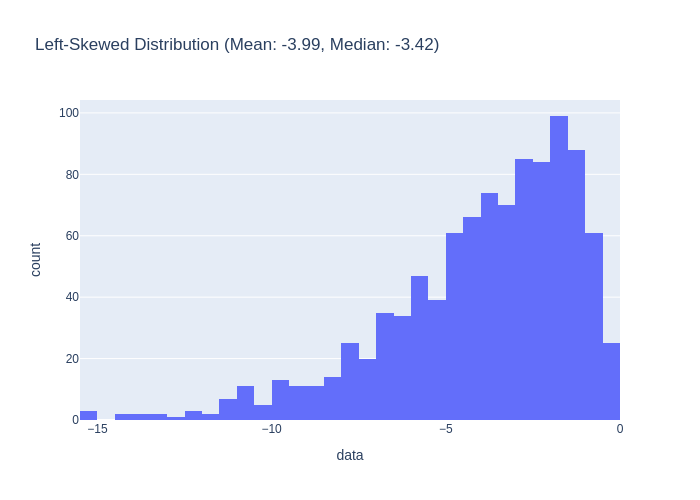

In [19]:
fig_left.show(renderer="png")

This is the skewed left graph, the mean can be seen further left (smaller values) due to outlier values

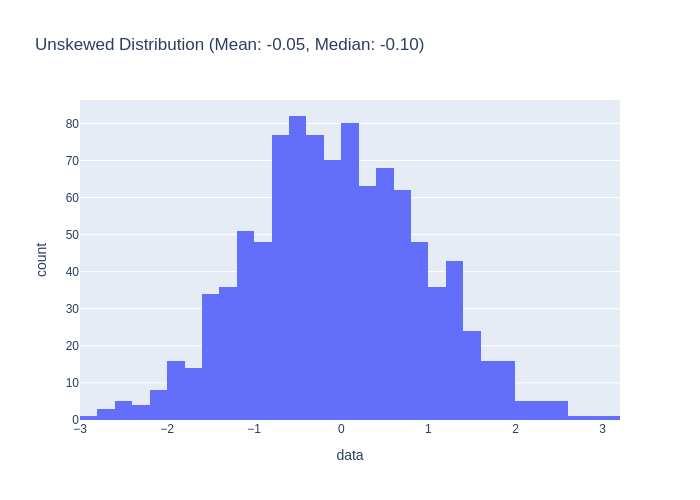

In [20]:
fig_unskewed.show(renderer="png")

This is the unskwewed graph, the mean can be seen equal to the median due to both the average of all points and the most common point being the same. This data does not have a skew to either side. 

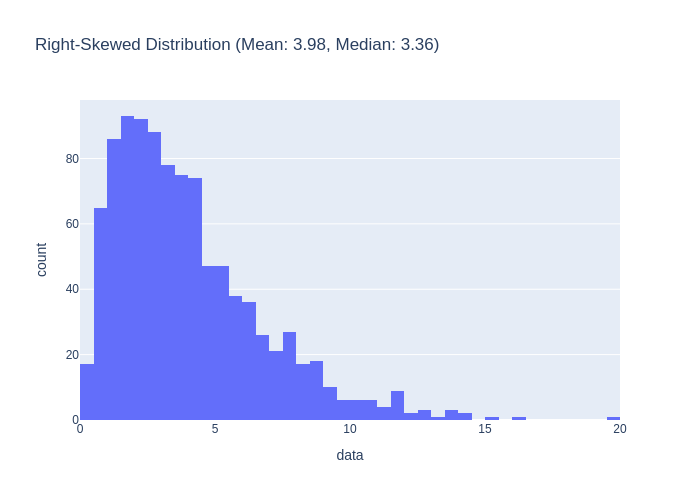

In [21]:
fig_right.show(renderer="png")

This is the skewed right graph, the mean can be seen greater than the median due to outlier points pulling the mean higher. The skew pulls the mean(average) to be a higher value. 

In [22]:
import pandas as pd

# Example of loading a CSV in a Kaggle Kernel (where the file is already hosted on Kaggle)
df = pd.read_csv('lol_games.csv')

# Display the first few rows
df.describe()

,gameId,creationTime,gameDuration,seasonId,winner,firstBlood,firstTower,firstInhibitor,firstBaron,firstDragon,...,t2_towerKills,t2_inhibitorKills,t2_baronKills,t2_dragonKills,t2_riftHeraldKills,t2_ban1,t2_ban2,t2_ban3,t2_ban4,t2_ban5
count,5.149000e+04,5.149000e+04,51490.000000,51490.0,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,...,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000,51490.000000
mean,3.306223e+09,1.502926e+12,1832.362808,9.0,1.493552,1.471295,1.450631,1.308487,0.926510,1.442804,...,5.549466,0.985084,0.414547,1.404370,0.240105,108.216294,107.910216,108.690581,108.626044,108.066576
std,2.946096e+07,1.978026e+09,512.017696,0.0,0.499963,0.520326,0.542848,0.676097,0.841424,0.569579,...,3.860989,1.256284,0.613768,1.224492,0.427151,102.551787,102.870710,102.592145,103.346952,102.756149
min,3.214824e+09,1.496892e+12,190.000000,9.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,3.292218e+09,1.502021e+12,1531.000000,9.0,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,38.000000,37.000000,38.000000,38.000000,38.000000
50%,3.320021e+09,1.503844e+12,1833.000000,9.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,0.000000,0.000000,1.000000,0.000000,90.000000,90.000000,90.000000,90.000000,90.000000
75%,3.327099e+09,1.504352e+12,2148.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,9.000000,2.000000,1.000000,2.000000,0.000000,141.000000,141.000000,141.000000,141.000000,141.000000
max,3.331833e+09,1.504707e+12,4728.000000,9.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,11.000000,10.000000,4.000000,6.000000,1.000000,516.000000,516.000000,516.000000,516.000000,516.000000


0    1949
1    1851
2    1493
3    1758
4    2094
Name: gameDuration, dtype: int64


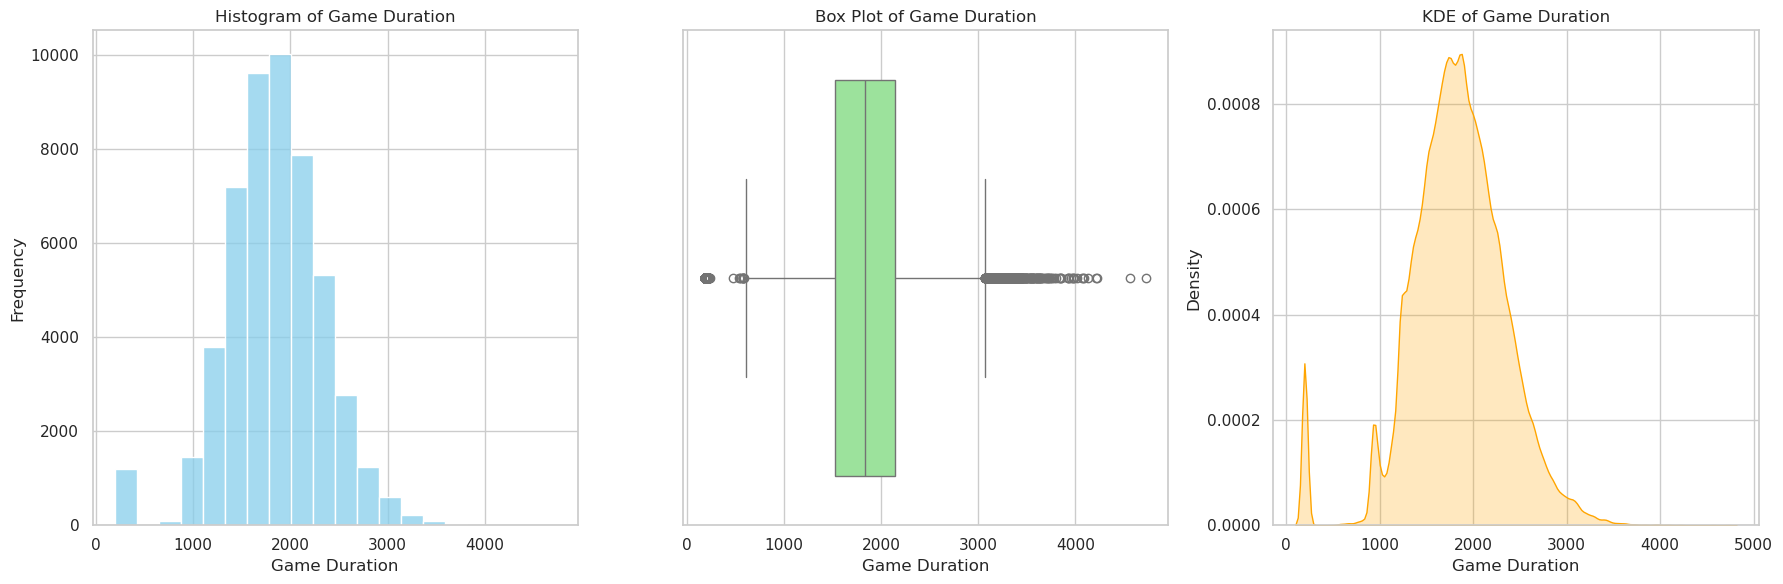

In [23]:
# Inspect the data to check the 'game_duration' column
print(df['gameDuration'].head())

# Set the style for the plots
sns.set(style="whitegrid")

# Create subplots
plt.figure(figsize=(18, 6))

# 1. Histogram of 'game_duration'
plt.subplot(1, 3, 1)  # 1 row, 3 columns, 1st subplot
sns.histplot(df['gameDuration'], bins=20, kde=False, color='skyblue')
plt.title('Histogram of Game Duration')
plt.xlabel('Game Duration')
plt.ylabel('Frequency')

# 2. Box Plot of 'game_duration'
plt.subplot(1, 3, 2)  # 1 row, 3 columns, 2nd subplot
sns.boxplot(x=df['gameDuration'], color='lightgreen')
plt.title('Box Plot of Game Duration')
plt.xlabel('Game Duration')

# 3. KDE of 'game_duration'
plt.subplot(1, 3, 3)  # 1 row, 3 columns, 3rd subplot
sns.kdeplot(df['gameDuration'], fill=True, color='orange', bw_adjust=0.5)
plt.title('KDE of Game Duration')
plt.xlabel('Game Duration')
plt.ylabel('Density')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [24]:
import plotly.express as px
df = px.data.gapminder()
px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

In [25]:
import plotly.express as px

# Load the Gapminder dataset
df = px.data.gapminder()

# Example: Creating new columns for demonstration purposes
# Replace these calculations with actual data manipulation as necessary
df['percent_change'] = df['gdpPercap'].pct_change()  # Example of percent change
df['rank'] = df.groupby('year')['lifeExp'].rank()  # Example of ranking based on life expectancy
df['percent'] = df['pop'] / df['pop'].sum()  # Example of percent of population

# Create the animated scatter plot with the new parameters
fig2 = px.scatter(df, 
                  x="percent_change", 
                  y="rank", 
                  animation_frame="year", 
                  animation_group="country",  # Use 'country' for grouping
                  hover_name="country",  # Use 'country' for hover
                  size="percent", 
                  color="continent",  # Adjusted to color by continent
                  size_max=50, 
                  range_x=[-0.005, 0.005])

# Display the figure
fig2.show()


9) Yes